# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [7]:
dataDir = "C:/AV/Carla/CARLA_0.9.13/WindowsNoEditor/PythonAPI/experiments/logs"


In [4]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\TTI-dataset-tools\src


In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [18]:
date = "2023-09-10-00-00"
fps=25
minYDisplacement = 5
maxXDisplacement = 9
df = pd.read_csv(os.path.join(dataDir, f"{date}-tracks.csv"))
df["uniqueTrackId"] = df["recordingId"] * 1000000 + df["trackId"]
pedDf = df[df["class"] == "pedestrian"].copy()
otherDf = df[df["class"] != "pedestrian"].copy()
print(pedDf.head())

     recordingId  trackId       class  frame     x     y  heading  \
250            1      409  pedestrian      1 -84.0  25.0      0.0   
251            1      409  pedestrian      2 -84.0  25.0      0.0   
252            1      409  pedestrian      3 -84.0  25.0      0.0   
253            1      409  pedestrian      4 -84.0  25.0      0.0   
254            1      409  pedestrian      5 -84.0  25.0      0.0   

           state  uniqueTrackId  
250  INITALIZING        1000409  
251  INITALIZING        1000409  
252  INITALIZING        1000409  
253  INITALIZING        1000409  
254  INITALIZING        1000409  


In [15]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='x', 
        yCol='y',
        xVelCol='xVel', 
        yVelCol='yVel', 
        speedCol='speed',
        fps=fps,
    )
transformer = TrajectoryTransformer(colMapper)

In [19]:
transformer.deriveAxisVelocities(pedDf)
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,trackId,frame,x,y,heading,uniqueTrackId,xVel,yVel,speed,displacementX,displacementY
count,250.0,250.0,250.000000,250.000000,250.000000,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1.0,409.0,125.500000,-82.584370,24.028050,-18.513757,1000409.0,-0.262434,0.162368,0.381344,1.415630,0.971950
std,0.0,0.0,72.312977,0.907234,0.513108,11.834526,0.0,0.515135,1.064946,1.161501,0.907234,0.513108
min,1.0,409.0,1.000000,-84.000000,23.376322,-38.677650,1000409.0,-3.847504,-0.346661,0.000000,0.000000,0.000000
25%,1.0,409.0,63.250000,-83.676083,23.449898,-24.276047,1000409.0,-0.344801,0.000000,0.000000,0.323917,0.611961
50%,1.0,409.0,125.500000,-82.625092,24.211930,-18.345345,1000409.0,-0.049877,0.000000,0.118892,1.374908,0.788070
75%,1.0,409.0,187.750000,-81.618652,24.388039,-14.400731,1000409.0,0.000000,0.161946,0.459685,2.381348,1.550102
max,1.0,409.0,250.000000,-81.375664,25.000000,0.000000,1000409.0,0.102997,16.602421,17.042408,2.624336,1.623678


In [24]:
pedIds = pedDf["uniqueTrackId"].unique()

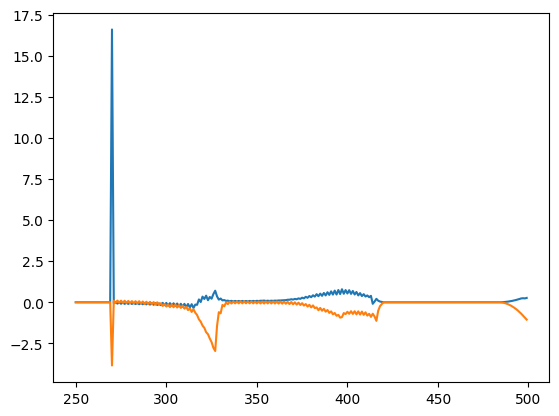

In [26]:
aPed = pedDf[pedDf["uniqueTrackId"] == pedIds[0]]
plt.plot(aPed["yVel"])
plt.plot(aPed["xVel"])

In [27]:
# we need to clip it before the translation